# South African Language Identification Hack 2022
# EDSA 2201 & 2207 classification hackathon
© Explore Data Science Academy


## EXPLORE Data Science Academy Classification Hackathon
### Overview

South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.

From South African Government


<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Preprocessing</a>

<a href=#three>4. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

<a href=#eight>8. Pipeline Developement</a>

<a href=#nine>9. Preparing the test data and submission file </a>

<a href=#ten>10. Final Thoughts and reccomendations</a>



<a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>


In [41]:

# Importing modules
import nltk

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import re

# Magic function to enable graphs and plots to be plotted below the cell where your plotting commands are written
%matplotlib inline

# Set plot style
sns.set()



<a id="two"></a>
## 2. Loading Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


In [42]:

# Loading the training data for the model 
df_train = pd.read_csv("train_set.csv")


In [43]:

# Loading the testing data for the model 
df_test = pd.read_csv("test_set.csv")


In [44]:

# Viewing the data type info for the train data
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [45]:

# Viewing the data type info for the test data
df_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   5682 non-null   int64 
 1   text    5682 non-null   object
dtypes: int64(1), object(1)
memory usage: 88.9+ KB



<a id="three"></a>
## 3. Data Cleaning
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


In [46]:

# Viewing the first five row of the train data
df_train.head()


,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [47]:

# Viewing the last five row of the train data
df_train.tail()


,lang_id,text
32995,tsn,popo ya dipolateforomo tse ke go tlisa boetele...
32996,sot,modise mosadi na o ntse o sa utlwe hore thaban...
32997,eng,closing date for the submission of completed t...
32998,xho,nawuphina umntu ofunyenwe enetyala phantsi kwa...
32999,sot,mafapha a mang le ona a lokela ho etsa ditlale...


In [48]:

# Viewing the first five row of the test data
df_test.head()


,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


In [49]:

# Viewing the last five row of the train data
df_test.tail()


,index,text
5677,5678,You mark your ballot in private.
5678,5679,Ge o ka kgetha ka bowena go se šomiše Mofani k...
5679,5680,"E Ka kopo etsa kgetho ya hao ka hloko, hobane ..."
5680,5681,"TB ke bokudi ba PMB, mme Morero o tla lefella ..."
5681,5682,Vakatjhela iwebhusayidi yethu ku-www.



From viewing the first and last 5 rows of my dataset, i observed that the `df_train` dataset is clean and the `df_test` is not clean because it contains some noise of capitalisation, punctuations and numbers.

##### Data Cleaning on the `df_test`

- Making all text lowercase, removing numbers and punctuations


In [50]:

# Make lower case
print ('Lowering case...')
df_train["clean_text"] = df_train["text"].str.lower()
df_test["clean_text"] = df_test["text"].str.lower()

# Remove punctuation
import string

print ('Cleaning numbers...')
print ('Cleaning punctuation...')

def remove_punctuation_numbers(text):
    punc_numbers = string.punctuation + '0123456789'
    return ''.join([l for l in text if l not in punc_numbers])

df_train["clean_text"] = df_train["clean_text"].apply(remove_punctuation_numbers)
df_test["clean_text"] = df_test["clean_text"].apply(remove_punctuation_numbers)


Lowering case...
Cleaning numbers...
Cleaning punctuation...


In [51]:

# Viewing the first 10 rows
df_train.head(10)


,lang_id,text,clean_text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,idha iya kuba nobulumko bokubeka umsebenzi nap...
2,eng,the province of kwazulu-natal department of tr...,the province of kwazulunatal department of tra...
3,nso,o netefatša gore o ba file dilo ka moka tše le...,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...
5,nso,dinyakišišo tše tša go dirwa gabedi ka ngwaga ...,dinyakišišo tše tša go dirwa gabedi ka ngwaga ...
6,tsn,kgetse nngwe le nngwe e e sa faposiwang mo tsh...,kgetse nngwe le nngwe e e sa faposiwang mo tsh...
7,ven,mbadelo dze dza laelwa dzi do kwama mahatulele...,mbadelo dze dza laelwa dzi do kwama mahatulele...
8,nso,maloko a dikhuduthamaga a ikarabela mongwe le ...,maloko a dikhuduthamaga a ikarabela mongwe le ...
9,tsn,fa le dirisiwa lebone le tshwanetse go bontsha...,fa le dirisiwa lebone le tshwanetse go bontsha...


In [52]:

# Viewing the last 10 rows
df_train.tail(10)


,lang_id,text,clean_text
32990,eng,government has a long-term programme for the u...,government has a longterm programme for the up...
32991,nso,mo kgopelo e dirilwego go ya ka karolo ya go b...,mo kgopelo e dirilwego go ya ka karolo ya go b...
32992,zul,a umqondisi-jikelele azise umuntu okukhulunywa...,a umqondisijikelele azise umuntu okukhulunywa ...
32993,nso,molawana o akaretša mesepelo ka moka ya baname...,molawana o akaretša mesepelo ka moka ya baname...
32994,eng,manuel marin s ill-fated debt sources but very...,manuel marin s illfated debt sources but very ...
32995,tsn,popo ya dipolateforomo tse ke go tlisa boetele...,popo ya dipolateforomo tse ke go tlisa boetele...
32996,sot,modise mosadi na o ntse o sa utlwe hore thaban...,modise mosadi na o ntse o sa utlwe hore thaban...
32997,eng,closing date for the submission of completed t...,closing date for the submission of completed t...
32998,xho,nawuphina umntu ofunyenwe enetyala phantsi kwa...,nawuphina umntu ofunyenwe enetyala phantsi kwa...
32999,sot,mafapha a mang le ona a lokela ho etsa ditlale...,mafapha a mang le ona a lokela ho etsa ditlale...


In [53]:

# Viewing the first 10 rows
df_test.head(10)


,index,text,clean_text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele...",mmasepala fa maemo a a kgethegileng a letlelel...
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...,uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.,tshivhumbeo tshi fana na ngano dza vhathu
3,4,Kube inja nelikati betingevakala kutsi titsini...,kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.,winste op buitelandse valuta
5,6,"Ke feela dilense tše hlakilego, tša pono e tee...",ke feela dilense tše hlakilego tša pono e tee ...
6,7,<fn>(762010101403 AM) 1495 Final Gems Birthing...,fn am final gems birthing optionszulutxtfn
7,8,Ntjhafatso ya konteraka ya mosebetsi: Etsa bon...,ntjhafatso ya konteraka ya mosebetsi etsa bonn...
8,9,u-GEMS uhlinzeka ngezinzuzo zemithi yezifo ezi...,ugems uhlinzeka ngezinzuzo zemithi yezifo ezin...
9,10,"So, on occasion, are statistics misused.",so on occasion are statistics misused


In [54]:

# Viewing the last 10 rows
df_test.tail(10)


,index,text,clean_text
5672,5673,Die raad kan van tyd tot tyd en in ooreenstemm...,die raad kan van tyd tot tyd en in ooreenstemm...
5673,5674,halutshedzo ya ' tshiimo tsha u vha na vhudzim...,halutshedzo ya tshiimo tsha u vha na vhudzimu...
5674,5675,botlalo tšeo di hlokegago o mongwe le o mongwe.,botlalo tšeo di hlokegago o mongwe le o mongwe
5675,5676,Muanewa-muhali. Mafhungo o he a lungano a kwam...,muanewamuhali mafhungo o he a lungano a kwama ...
5676,5677,Afitafiti go tšwa go leloko go netefatša tlhok...,afitafiti go tšwa go leloko go netefatša tlhok...
5677,5678,You mark your ballot in private.,you mark your ballot in private
5678,5679,Ge o ka kgetha ka bowena go se šomiše Mofani k...,ge o ka kgetha ka bowena go se šomiše mofani k...
5679,5680,"E Ka kopo etsa kgetho ya hao ka hloko, hobane ...",e ka kopo etsa kgetho ya hao ka hloko hobane h...
5680,5681,"TB ke bokudi ba PMB, mme Morero o tla lefella ...",tb ke bokudi ba pmb mme morero o tla lefella t...
5681,5682,Vakatjhela iwebhusayidi yethu ku-www.,vakatjhela iwebhusayidi yethu kuwww



<a id="three"></a>
## 4. Preprocessing
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>



<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


In [55]:

# Feature extraction using the 'CountVectorizer'
from sklearn.feature_extraction.text import CountVectorizer

betterVect = CountVectorizer(min_df=2,
                             max_df=0.5,
                             ngram_range=(1, 1))


In [56]:

# Defining variables
X = betterVect.fit_transform(df_train["text"])

y = df_train["lang_id"]  


In [57]:

# Importing the modeule to split the data
from sklearn.model_selection import train_test_split

# Spliting the 'df_train' using the 'train-test_split' 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [58]:

# Importing models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB


In [59]:

names = ["Logistic Regression", "Random Forest", "Naive Bayes"]


In [60]:

classifiers = [
    LogisticRegression(),
    
    RandomForestClassifier(max_depth = 5, n_estimators = 1, max_features = 1),
    
    MultinomialNB(alpha = 0.3)
]


In [61]:

from sklearn import metrics


In [62]:
results = []

models = {}
confusion = {}
class_report = {}

for name, clf in zip(names, classifiers):
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(X_train, y_train)

    print ('... predicting')
    y_pred = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    print ('... scoring')
    accuracy  = metrics.accuracy_score(y_train, y_pred)
    precision = metrics.precision_score(y_train, y_pred, average = "weighted")
    recall    = metrics.recall_score(y_train, y_pred, average = "weighted")

    f1        = metrics.f1_score(y_train, y_pred, average = "weighted")
    f1_test   = metrics.f1_score(y_test, y_pred_test, average = "weighted")

    # Save the results to dictionaries
    models[name] = clf
    confusion[name] = metrics.confusion_matrix(y_train, y_pred)
    class_report[name] = metrics.classification_report(y_train, y_pred)

    results.append([name, accuracy, precision, recall, f1, f1_test, run_time.best])


results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test', 'Train Time'])
results.set_index('Classifier', inplace= True)

print ('... All done!')


Fitting Logistic Regression model...


C:\Users\F5470811\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\F5470811\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

... predicting
... scoring
Fitting Random Forest model...
... predicting
... scoring


C:\Users\F5470811\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\F5470811\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\F5470811\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\F5470811\ANACONDA\lib\site-packages\sklearn\metrics\_

Fitting Naive Bayes model...
... predicting
... scoring
... All done!



Here is the results of three models sorted in an ascending order, ordered by the `F1_score`


In [29]:

results.sort_values('F1 Train', ascending = False)


,Accuracy,Precision,Recall,F1 Train,F1 Test,Train Time
Classifier,,,,,,
Logistic Regression,1.000000,1.000000,1.000000,1.000000,0.994394,18.139450
Naive Bayes,0.999924,0.999924,0.999924,0.999924,0.999242,0.128379
Random Forest,0.091894,0.280203,0.091894,0.016043,0.015555,0.062011



Here is the plot of these values to view them visually to make sense of them.


<AxesSubplot:xlabel='Classifier'>

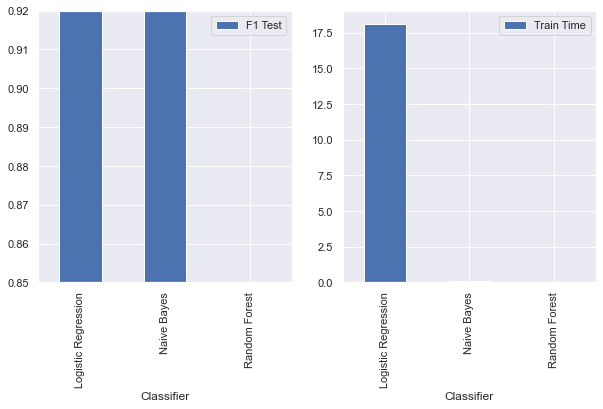

In [30]:

fig, ax = plt.subplots(1, 2, figsize = (10, 5))
results.sort_values("F1 Train", ascending = False, inplace = True)
results.plot(y = ["F1 Test"], kind=  "bar", ax = ax[0], xlim = [0, 1.1], ylim = [0.85, 0.92])
results.plot(y = "Train Time", kind = "bar", ax = ax[1])


In [31]:
print("Logistic Regression Classification Report")
print(class_report["Logistic Regression"])
print("\n")

print("Random Forest Classification Report")
print(class_report["Random Forest"])
print("\n")

print("Multinomial Naive Bayes Classification Report")
print(class_report["Naive Bayes"])


Logistic Regression Classification Report
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00      2417
         eng       1.00      1.00      1.00      2385
         nbl       1.00      1.00      1.00      2417
         nso       1.00      1.00      1.00      2375
         sot       1.00      1.00      1.00      2382
         ssw       1.00      1.00      1.00      2416
         tsn       1.00      1.00      1.00      2402
         tso       1.00      1.00      1.00      2439
         ven       1.00      1.00      1.00      2366
         xho       1.00      1.00      1.00      2391
         zul       1.00      1.00      1.00      2410

    accuracy                           1.00     26400
   macro avg       1.00      1.00      1.00     26400
weighted avg       1.00      1.00      1.00     26400



Random Forest Classification Report
              precision    recall  f1-score   support

         afr       0.09      1.00      0.17      241

In [63]:

model = MultinomialNB(alpha = 0.1)
model.fit(X_train, y_train)


MultinomialNB(alpha=0.1)

In [68]:

lr_pred = model.predict(X_test)

submission_df = pd.DataFrame(df_test['index'])

test1 = df_test['text']

# vectorise test data

test_vec = betterVect.transform(test1)

# Predict the sentiment using the test data

y_pred = model.predict(test_vec)

# Assign a new column of predictions

submission_df['lang_id'] = y_pred

# save the csv file and submit it.

submission_df.to_csv('submission_final.csv', index=False)

# language_id = pd.DataFrame(lr_pred, columns = ["lang_id"])
# column_index = pd.DataFrame({"index": df_test["index"]})
# submission = column_index.join(language_id)
# submission.to_csv('my_submission.csv', index = False)


In [69]:

submission_df.head(20)


,index,lang_id
0,1,tsn
1,2,nbl
2,3,ven
3,4,ssw
4,5,afr
5,6,nso
6,7,eng
7,8,sot
8,9,zul
9,10,eng


In [107]:

my_x_test = betterVect.fit_transform(df_test["text"]) 

MultinomialNB_model = MultinomialNB(alpha = 0.3)

# d = pd.read_csv("test_set.csv")

d_X = betterVect.fit_transform(d["text"]) 

MultinomialNB_model.fit(X_train, y_train)

final_pred = MultinomialNB_model.predict(d_X)

submission = d["index"]

# submission["lang_id"] = final_pred

language_id = pd.DataFrame(final_pred, columns = ["lang_id"])

submission = pd.DataFrame({"index": d["index"]})

submission = column_index.join(language_id)

submission.to_csv('my_submission.csv', index = False)


In [104]:

# my_x_test = betterVect.fit_transform(df_test["text"]) 

uncln = df_test.copy() 

_uncln_ = betterVect.fit_transform(uncln["text"]) 

lr_model = LogisticRegression()

lr_model.fit(X_train, y_train)

final_pred = lr_model.predict(_uncln_)

submission = df_test["index"]

# submission["lang_id"] = final_pred

language_id = pd.DataFrame(final_pred, columns = ["lang_id"])

submission = pd.DataFrame({"index": df_test["index"]})

submission = column_index.join(language_id)

submission.to_csv('my_submission.csv', index = False)


C:\Users\F5470811\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [66]:

# Submission to kaggle

# final_test = df_test["index"]

# testVec = betterVect.transform(final_test)

# lr_pred = lr_model.predict(testVec)

# df_test["lang_id"] = lr_pred

# my_submission = df_test[["index", "lang_id"]]

# my_submission.to_csv("my_submission.csv", index = False)

# language_id = pd.DataFrame(lr_pred, columns = ["lang_id"])
# column_index = pd.DataFrame({"index": df_test["index"]})
# submission = column_index.join(language_id)
# submission.to_csv('my_submission.csv', index = False)


In [108]:

# Viewing 'my_submission.csv' file
submission.head()


,index,lang_id
0,1,xho
1,2,tsn
2,3,zul
3,4,xho
4,5,eng


In [109]:
submission.tail()


,index,lang_id
5677,5678,tsn
5678,5679,zul
5679,5680,nbl
5680,5681,nso
5681,5682,eng
